<a href="https://colab.research.google.com/github/surajsingh1204/weatherdata_analysis/blob/main/weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('DailyClimateTest[1].csv')

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.set_index('date', inplace=True)


In [ ]:
print(df.isnull().sum())



meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


In [ ]:
df['meantemp'] = df['meantemp'].interpolate()

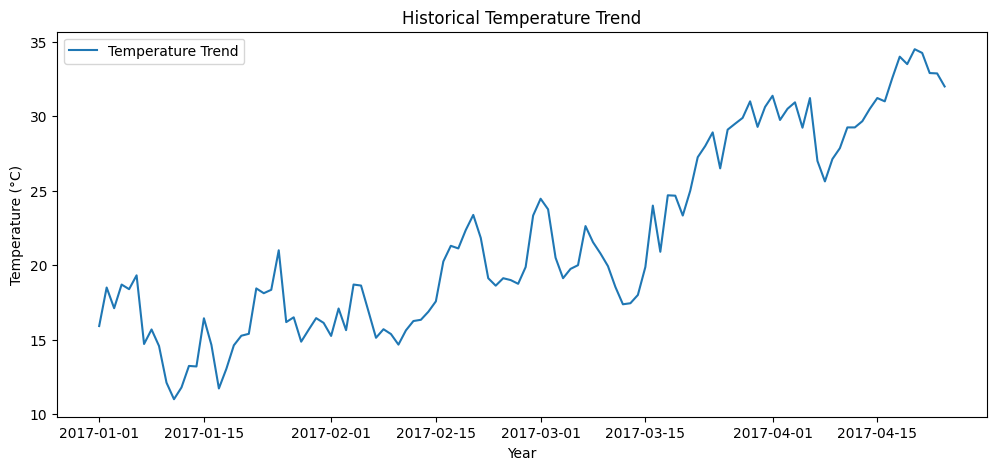

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df['meantemp'], label='Temperature Trend')
plt.title('Historical Temperature Trend')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np




In [ ]:
# Feature: day number
df['Day'] = np.arange(len(df))

# Split data
X = df[['Day']]
y = df['meantemp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R²:', r2_score(y_test, y_pred))

RMSE: 3.4502912184622305
R²: -1.1082621936180361


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


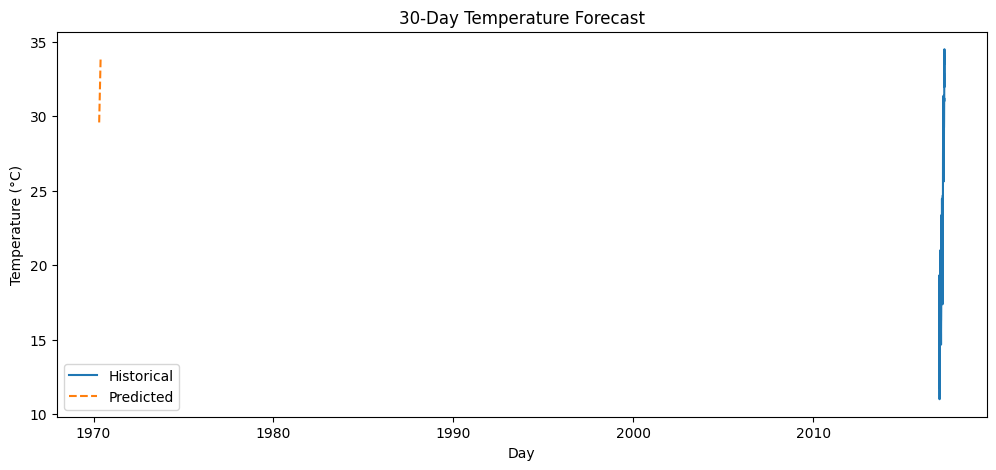

In [ ]:

future_days = np.arange(len(df), len(df) + 30).reshape(-1, 1)
future_pred = model.predict(future_days)

plt.figure(figsize=(12,5))
plt.plot(df['meantemp'], label='Historical')
plt.plot(range(len(df), len(df)+30), future_pred, label='Predicted', linestyle='--')
plt.title('30-Day Temperature Forecast')
plt.xlabel('Day')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()
